In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/simple_example.csv')
features = ['x']
labels = ['y']
# 划分训练集和测试集
train_data = data[:15]
test_data = data[15:]

In [3]:
def evaluate_model(model, test_data, features, labels, featurizer):
    """
    计算线性模型的均方差和决定系数

    参数
    ----
    model : LinearRegression, 训练完成的线性模型

    testData : DataFrame，测试数据

    features : list[str]，特征名列表

    labels : list[str]，标签名列表

    返回
    ----
    error : np.float64，均方差

    score : np.float64，决定系数
    """
    # 均方差(Mean Squared Error)，均方差越小越好
    error = model.predict(featurizer.fit_transform(test_data[features])) - test_data[labels]
    mse = np.mean(error.values ** 2)
    # 决定系数(Coefficient of determination)，决定系数越接近1越好
    score = model.score(featurizer.fit_transform(test_data[features]), test_data[labels])
    return mse, score

In [4]:
def train_model(train_data, features, labels, featurizer):
    """
    利用训练数据，估计模型参数

    参数
    ----
    trainData : DataFrame，训练数据集，包含特征和标签

    features : 特征名列表

    labels : 标签名列表

    返回
    ----
    model : LinearRegression, 训练好的线性模型
    """
    # 创建一个线性回归模型
    model = linear_model.LinearRegression(fit_intercept=False)
    # 训练模型，估计模型参数
    model.fit(featurizer.fit_transform(train_data[features]), train_data[labels])
    return model

In [5]:
def visualize_model(model, featurizer, data, features, labels, evaluation):
    """
    模型可视化
    """
    # 为在Matplotlib中显示中文，设置特殊字体
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams.update({'font.size': 13})
    # 创建一个图形框
    fig = plt.figure(figsize=(10, 10), dpi=100)
    # 在图形框里只画一幅图
    for i in range(4):
        ax = fig.add_subplot(2, 2, i+1)
        _visualization(ax, data, model[i], featurizer[i], evaluation[i], features, labels)
    return plt

def _visualization(ax, data, model, featurizer, evaluation, features, labels):
    """
    """
    # 画点图，用蓝色圆点表示原始数据
    ax.scatter(data[features], data[labels], color='b')
    # 画线图，用红色线条表示模型结果
    ax.plot(data[features], model.predict(featurizer.fit_transform(data[features])), color="r")
    # 显示均方差和决定系数
    ax.text(0.01, 0.99, f'均方差：{evaluation[0]:.3f}\n决定系数：{evaluation[1]:.3f}',
            style='italic', verticalalignment='top', horizontalalignment='left',
            transform=ax.transAxes, color='m', fontsize=16)

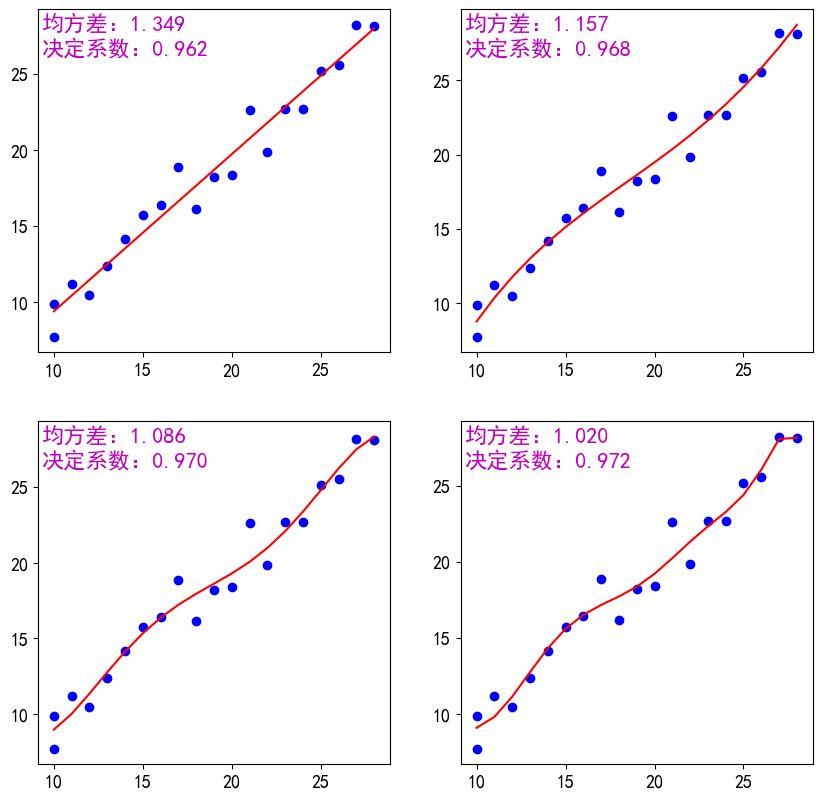

In [6]:
# 不区分训练数据集和测试数据集
featurizer = []
model = []
evaluation = []
for i in range(1, 11, 3):
    featurizer.append(PolynomialFeatures(degree=i))
    # 产生并训练模型
    model.append(train_model(data, features, labels, featurizer[-1]))
    # 评价模型效果
    evaluation.append(evaluate_model(model[-1], data, features, labels, featurizer[-1]))
# 图形化模型结果
re = visualize_model(model, featurizer, data, features, labels, evaluation)
re.savefig('linear_ml_overfitting1.png', dpi=200)

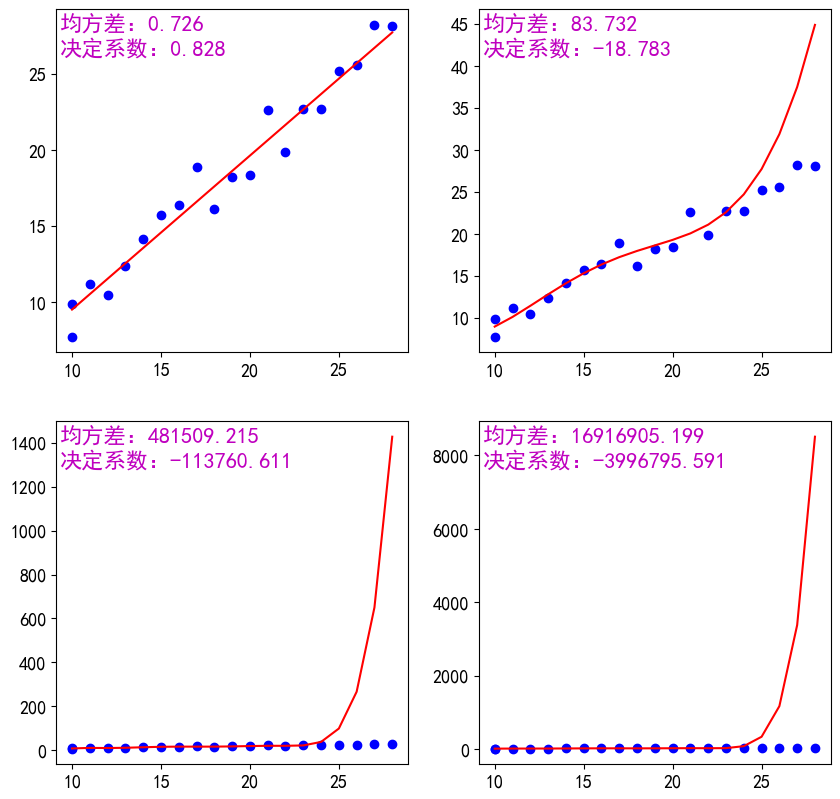

In [7]:
# 使用训练数据集训练数据，测试数据集评估模型效果
featurizer = []
overfitting_model = []
overfitting_evaluation = []
for i in range(1, 11, 3):
    featurizer.append(PolynomialFeatures(degree=i))
    # 产生并训练模型
    overfitting_model.append(train_model(train_data, features, labels, featurizer[-1]))
    # 评价模型效果
    overfitting_evaluation.append(
        evaluate_model(overfitting_model[-1], test_data, features, labels, featurizer[-1]))
# 图形化模型结果
re = visualize_model(overfitting_model, featurizer, data, features, labels, overfitting_evaluation)
re.savefig('linear_ml_overfitting2.png', dpi=200)